# CRISP-DM Quiz

## Phase 1 - Business Understanding
### Two ways to arrive at questions of interests
> 1. Data → Question → Solution
2. Question → Data → Solution

Here we use strategy 1, so we jump to Phase 2 - Quiz 1 first and came out with some questions.

Then go back to Phase 2 to find which columns can answer the questions.
- How to enter the field?
> CousinEducation
- What are job placement and salary rates for bootcamps?
> TimeAfterBootcamp & Salary
- What relates to salary?
> Many columns.
- What relates to job satisfaction?
> Many columns.

## Phase 2 - Data Understanding
### Quiz 1 - A Look at the Data

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

In [1]:
# Let's read in the data and necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.** Provide the number of rows and columns in this dataset.
> [pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) - Return a tuple representing the dimensionality of the DataFrame.

In [2]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"There're {num_rows} rows, {num_cols} columns.")

There're 51392 rows, 154 columns.


**2.** Which columns had no missing values? Provide a set of column names that have no missing values.
> - [pandas.DataFrame.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) - The column labels of the DataFrame.
- [pandas.notnull()](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.notnull.html) - Detect non-missing values for an array-like object.
- [pandas.DataFrame.all()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) - Return whether all elements are True, potentially over an axis.


In [3]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.notnull().all(axis='index')])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

**3.** Which columns have the most missing values? Provide a set of column names that have more than 75% if their values missing.
> [pandas.isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) - Detect missing values for an array-like object.

In [4]:
#Provide a set of columns with more than 75% of the values missing
most_missing_cols = set(df.columns[df.isnull().mean() >= 0.75])
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

**4.** Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.  Store this pandas series in **status_vals**.
> - [pandas.Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

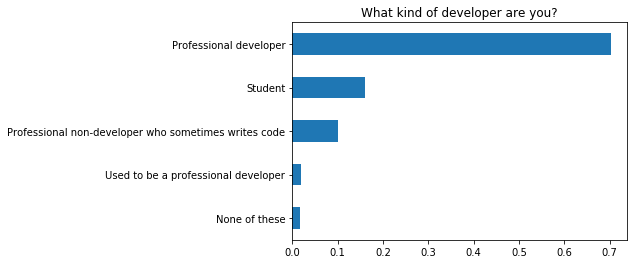

In [5]:
#Provide a pandas series of the counts for each Professional status
status_vals = df['Professional'].value_counts(sort=True, ascending=True)

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.
(status_vals/num_rows).plot(y=df['Professional'],kind="barh");
plt.title("What kind of developer are you?");

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset along with the count of how many individuals received that formal education.  Store this pandas series in **ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

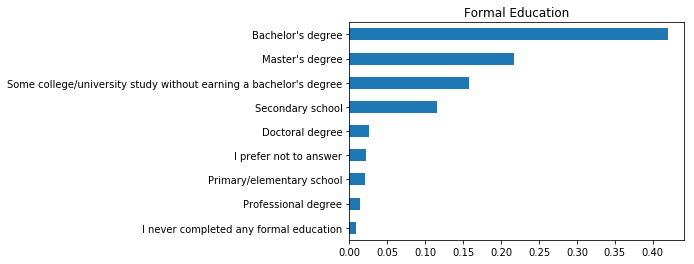

In [6]:
#Provide a pandas series of the counts for each FormalEducation status
ed_vals = df.FormalEducation.value_counts(sort=True, ascending=True)

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="barh");
plt.title("Formal Education");

**6.** Provide a pandas series of the different **Country** values in the dataset along with the count of how many individuals are from each country.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

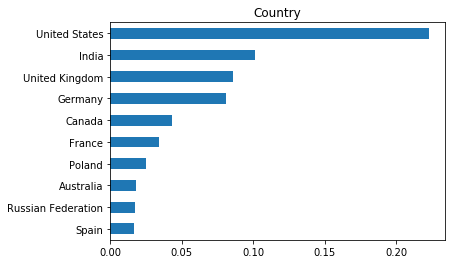

In [7]:
#Provide a pandas series of the counts for each Country
count_vals = df.Country.value_counts(sort=True, ascending=True)

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.
(count_vals[-10:]/df.shape[0]).plot(kind="barh");
plt.title("Country");

Feel free to explore the dataset further to gain additional familiarity with the columns and rows in the dataset.  You will be working pretty closely with this dataset throughout this lesson.

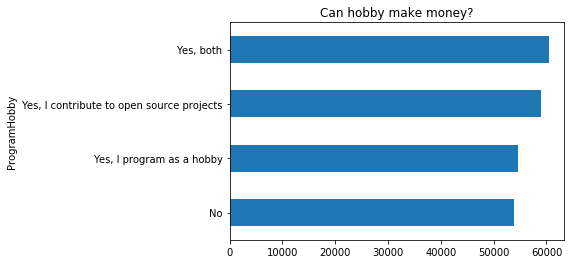

In [8]:
hobby_sal = df.groupby('ProgramHobby')['Salary'].mean().sort_values()
hobby_sal.plot(kind='barh');
plt.title("Can hobby make money?");

## Phase 3 - Prepare Data 
### Quiz 2 - How To Break Into the Field 

Now you have had a closer look at the data, and you saw how I approached looking at how the survey respondents think you should break into the field.  Let's recreate those results, as well as take a look at another question.

In [9]:
schema = pd.read_csv('./data/survey-results-schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


**1.** In order to understand how to break into the field, we will look at the **CousinEducation** field.  Use the **schema** dataset to answer this question.  Write a function called **get_description** that takes the **schema dataframe** and the **column** as a string, and returns a string of the description for that column.

In [10]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema.Column == column_name]['Question'])[0]
    return desc

get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

The question we have been focused on has been around how to break into the field.  Use your **get_description** function below to take a closer look at the **CousinEducation** column.

In [11]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

**2.** Provide a pandas series of the different **CousinEducation** status values in the dataset.  Store this pandas series in **cous_ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.  If it looks terrible, and you get no information from it, then you followed directions.  However, we should clean this up!

In [12]:
#Provide a pandas series of the counts for each CousinEducation status
cous_ed_vals = df.CousinEducation.value_counts()

cous_ed_vals.head() # assure this looks right

Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
Name: CousinEducation, dtype: int64

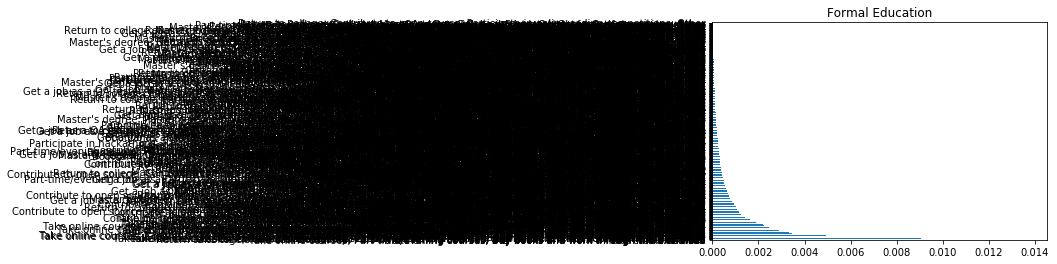

In [13]:
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(cous_ed_vals/df.shape[0]).plot(kind="barh");
plt.title("Formal Education");

We definitely need to clean this.  Above is an example of what happens when you do not clean your data. Below is what the data look like after cleaning.

In [14]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

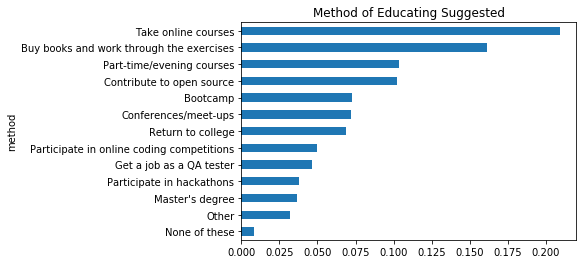

In [15]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        prop = (study_df/study_df.sum()).sort_values('count')
        prop.plot(kind='barh', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

**3.** I wonder if some of the individuals might have bias towards their own degrees.  Complete the function below that will apply to the elements of the **FormalEducation** column in **df**. 

In [16]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    formal_ed = ("Master's degree", "Doctoral", "Professional degree")
    if formal_ed_str in formal_ed:
        return 1
    else:
        return 0

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [17]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
print(f'The percentage of individuals in these three groups is {higher_ed_perc}')

The percentage of individuals in these three groups is 0.23069738480697385


**4.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

In [18]:
ed_1 = df[df.HigherEd == 1]# Subset df to only those with HigherEd of 1
ed_0 = df[df.HigherEd == 0]# Subset df to only those with HigherEd of 0

print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [19]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.207892,0.2099,-0.00200857
Buy books and work through the exercises,0.162073,0.161205,0.00086766
Part-time/evening courses,0.103298,0.103248,4.98833e-05
Contribute to open source,0.097821,0.10323,-0.00540923
Bootcamp,0.0746172,0.071824,0.0027932
Return to college,0.0687279,0.0689754,-0.000247487
Conferences/meet-ups,0.0658422,0.0739201,-0.00807796
Master's degree,0.0589517,0.0293459,0.0296058
Get a job as a QA tester,0.0484688,0.0457388,0.00273003


**5.** What can you conclude from the above plot?

- Everyone should get a higher level of formal education?
> False
- Regardless of formal education, online courses are the top suggested form of education?
> True
- There is less than a 1% difference between suggestions of the two groups for all forms of education?
> False
- Those with higher formal education suggest it more than those who do not have it?
> True

This concludes another look at the way we could compare education methods by those currently writing code in industry.

### What are job placement and salary rates for bootcamps?

In [20]:
boot = df[df.TimeAfterBootcamp.notnull()]
not_boot = df[df.TimeAfterBootcamp.isnull()]

# job propotion of people who attended to bootcamp
boot.TimeAfterBootcamp.value_counts() / boot.shape[0]

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

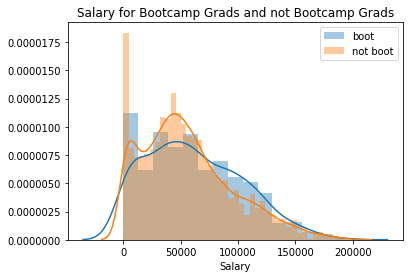

In [21]:
import seaborn as sns
boot_sal = df.Salary[df.TimeAfterBootcamp.notnull()].dropna()
not_boot_sal = df.Salary[df.TimeAfterBootcamp.isnull()].dropna()
sns.distplot(boot_sal)
sns.distplot(not_boot_sal)
plt.title('Salary for Bootcamp Grads and not Bootcamp Grads')
plt.legend(['boot', 'not boot']);

1. What does the data suggest about earnings completing the bootcamp?
> Not a whole lot.
2. How long until you earned a job after the bootcamp?
> - At least 20% of individuals earned jobs as developers upon graduation or earlier.
> - Approximately 46% of bootcamp grads in the dataset already had jobs as developers before beginning the bootcamp.

### Quiz 3 - Job Satisfaction

You will be exploring job satisfaction according to the survey results. Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [22]:
# The proportion of missing values in the Job Satisfaction column
df.JobSatisfaction.isnull().mean()

0.21435242839352428

In [23]:
# According to EmploymentStatus, average job satisfaction of each group
df.groupby('EmploymentStatus').JobSatisfaction.mean().sort_values(ascending=False)

EmploymentStatus
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [24]:
# In general, do smaller companies appear to have employees with higher job satisfaction?
df.groupby('CompanySize').JobSatisfaction.mean().sort_values(ascending=False)

CompanySize
I prefer not to answer      7.280835
Fewer than 10 employees     7.008749
10 to 19 employees          7.000799
20 to 99 employees          6.949092
100 to 499 employees        6.937089
1,000 to 4,999 employees    6.884509
500 to 999 employees        6.883661
I don't know                6.842679
10,000 or more employees    6.810345
5,000 to 9,999 employees    6.748153
Name: JobSatisfaction, dtype: float64

- The proportion of missing values in the Job Satisfaction column
> 0.2144
- According to EmploymentStatus, which group has the highest average job satisfaction?
> Contractor
- In general, do smaller companies appear to have employees with higher job satisfaction?
> True

In [25]:
# Do individuals who program outside of work appear to have higher JobSatisfaction?
df.groupby(['ProgramHobby']).mean().JobSatisfaction.sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.108041
Yes, I contribute to open source projects    7.041535
Yes, I program as a hobby                    6.913072
No                                           6.833825
Name: JobSatisfaction, dtype: float64

In [26]:
# Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?
df.groupby(['HomeRemote']).mean().JobSatisfaction.sort_values(ascending=False)

HomeRemote
All or almost all the time (I'm full-time remote)          7.388430
Less than half the time, but at least one day each week    7.120125
A few days each month                                      7.077509
About half the time                                        6.973702
More than half, but not all, the time                      6.953184
It's complicated                                           6.840830
Never                                                      6.632502
Name: JobSatisfaction, dtype: float64

In [27]:
# A friend says a Doctoral degree increases the chance of having job you like, does this seem true?
df.groupby(['FormalEducation']).mean().JobSatisfaction.sort_values(ascending=False)

FormalEducation
Doctoral degree                                                      7.348857
Secondary school                                                     7.143082
Professional degree                                                  7.087459
Some college/university study without earning a bachelor's degree    7.081334
I prefer not to answer                                               7.005682
Primary/elementary school                                            6.956897
Master's degree                                                      6.953151
Bachelor's degree                                                    6.866363
I never completed any formal education                               6.833333
Name: JobSatisfaction, dtype: float64

- Do individuals who program outside of work appear to have higher JobSatisfaction? 
> Yes
- Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?
> Yes
- A friend says a Doctoral degree increases the chance of having job you like, does this seem true?
> Yes

## Phase 5 - Evaluate the Results
From the Quiz 1 to Quiz 3.

we did not need to do any predictive modeling (Phase 4). We only used **descriptive** and a little **inferential** statistics to retrieve the results (Phase 5).

> **Not every data science project invole machine learning.**

### All Data Science Problems Involve
- Curiosity.
- The **right** data.
- A tool of some kind (Python, Tableau, Excel, R, etc.) used to find a solution.
- Well communicated or deployed solution.

## Phase 4 - Data Modeling
Supervised ML process (sk-learn)
1. Instantiate
2. Fit
3. Predict
4. Score

_**Phase 3 is essential to getting the most out of your data.**_

### Quiz 4 - First Try of Predicting Salary

For the last two questions regarding what are related to relationships of variables with salary and job satisfaction - Each of these questions will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

Now take a look at the summary statistics associated with the quantitative variables in your dataset. 

In [29]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,HigherEd
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000,51392.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468,0.230697
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829,0.421283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484,0.000000
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691,0.000000
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806,0.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000,1.000000


In [30]:
df.shape

(51392, 155)

**1.** Use the above to answer the following questions

- A column just listing an index for each row
> Respondent

- The maximum Satisfaction on the scales for the survey
> 10

- The column with the most missing values
> ExpectedSalary

- The variable with the highest spread of values
> Salary

A picture can often tell us more than numbers.

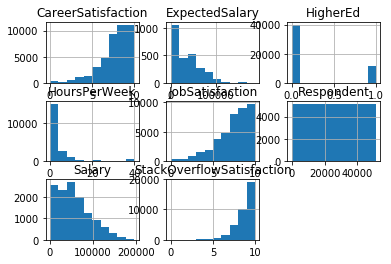

In [31]:
df.hist();

Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

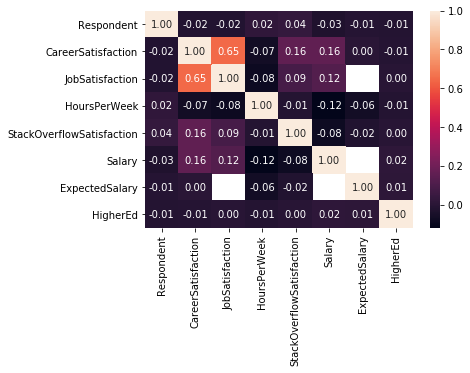

In [32]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

**2.** Use the scatterplot matrix above to answer the following questions

- The column with the strongest correlation with Salary
> CareerSatisfaction
- The data suggests more hours worked relates to higher salary
> No
- Data in the ______ column meant missing data in two other columns
> ExpectedSalary
- The strongest negative relationship had what correlation
> -0.12

Here we move our quantitative variables to an X matrix, which we will use to predict our response.  We also create our response.  We then split our data into training and testing data.  Then when starting our four step process, our fit step breaks.  

### Remember from the Video, this code will break!

In [33]:
# Consider only numerical variables
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary'] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Four steps:
# Instantiate
lm_model = LinearRegression(normalize=True)

# Fit - why does this break?
try:
    lm_model.fit(X_train, y_train)
except Exception as e:
    print(e)
#Predict
#Score

Input contains NaN, infinity or a value too large for dtype('float64').


**3.** Use the results above to answer the following questions.

- What is the reason that the fit method broke?
> sklearn fit methods cannot accept NAN values
- What does the random_state parameter do for the train_test_split function?
> it assures the same train and test split will occur for different users
- What is the purpose of creating a train test split?
> it is a way to assure your model extends well to new data

## Missing Value

There are two main 'pain' points for passing data to machine learning models in sklearn:
1. Missing Values
2. Categorical Values

### Quiz 5 - Removing Values

You have seen:

1. sklearn break when introducing missing values
2. reasons for dropping missing values (Think carefully)

It is time to make sure you are comfortable with the methods for dropping missing values in pandas. 

You can drop values by row or by column, and you can drop based on whether **any** value is missing in a particular row or column or **all** are values in a row or column are missing.

A useful set of many resources in pandas is available [here](https://chrisalbon.com/).  Specifically, Chris takes a close look at missing values [here](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).  Another resource can be found [here](https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan).

In [34]:
small_dataset = pd.DataFrame({'col1': [1, 2, np.nan, np.nan, 5, 6], 
                              'col2': [7, 8, np.nan, 10, 11, 12],
                              'col3': [np.nan, 14, np.nan, 16, 17, 18]})

small_dataset

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
2,NaN,NaN,NaN
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


**1.** Drop any row with a missing value.

In [35]:
all_drop  = small_dataset.dropna()

#print result
all_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


**2.** Drop only the row with all missing values.

In [36]:
all_row = small_dataset.dropna(how='all')

#print result
all_row

,col1,col2,col3
0,1.0,7.0,NaN
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


**3.** Drop only the rows with missing values in column 3.

In [37]:
only3_drop = small_dataset[small_dataset.col3.notnull()]
only3_drop = small_dataset.dropna(subset=['col3'], how='any')

#print result
only3_drop

,col1,col2,col3
1,2.0,8.0,14.0
3,NaN,10.0,16.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


**4.** Drop only the rows with missing values in column 3 or column 1.

In [38]:
only3or1_drop = small_dataset.dropna(subset=['col1', 'col3'])

#print result
only3or1_drop

,col1,col2,col3
1,2.0,8.0,14.0
4,5.0,11.0,17.0
5,6.0,12.0,18.0


## Quiz 6 - Removing Data Part II

So, you now have seen how we can fit a model by dropping rows with missing values.  This is great in that sklearn doesn't break! However, this means future observations will not obtain a prediction if they have missing values in any of the columns.

In this notebook, you will answer a few questions about what happened in the last screencast, and take a few additional steps.

**1.** What proportion of individuals in the dataset reported a salary?

In [39]:
#Subset to only quantitative vars
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

In [40]:
prop_sals = df.Salary.notnull().mean()
prop_sals

0.25083670610211706

**2.** Remove the rows associated with nan values in Salary (only Salary) from the dataframe **num_vars**.  Store the dataframe with these rows removed in **sal_rem**.

In [41]:
sal_rm = num_vars.dropna(subset=['Salary'])
sal_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


**3.** Using **sal_rm**, create **X** be a dataframe (matrix) of all of the numeric feature variables.  

Then, let **y** be the response vector you would like to predict (Salary).  

Run the cell below once you have split the data, and use the result of the code to assign the correct letter to **question3_solution**.

In [42]:
X = sal_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = sal_rm['Salary']

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

Oh no! It doesn't work!!!


```python
a = 'Python just likes to break sometimes for no reason at all.' 
b = 'It worked, because Python is magic.'
c = 'It broke because we still have missing values in X'

question3_solution = c
```

**4.** Remove the rows associated with nan values in any column from **num_vars**.  

Store the dataframe with these rows removed in **all_rem**.

In [43]:
all_rm = num_vars.dropna()
all_rm.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
25,175000.000000,7.0,0.0,7.0,9.0
34,14838.709677,10.0,1.0,8.0,10.0
52,15674.203822,6.0,4.0,5.0,8.0
57,43010.752688,10.0,2.0,6.0,10.0
70,65000.000000,8.0,2.0,5.0,7.0


**5.** Using **all_rm**, create **X_2** be a dataframe (matrix) of all of the numeric feature variables.  

Then, let **y_2** be the response vector you would like to predict (Salary).  

Run the cell below once you have split the data, and use the result of the code to assign the correct letter to **question5_solution**.

In [44]:
X_2 = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y_2 = all_rm['Salary']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")

```python
a = 'Python just likes to break sometimes for no reason at all.' 
b = 'It worked, because Python is magic.'
c = 'It broke because we still have missing values in X'

question5_solution = b
```

**6.** Now, use **lm_2_model** to predict the **y_2_test** response values, and obtain an r-squared value for how well the predicted values compare to the actual test values.  

In [45]:
# Predictions here using X_2 and lm_2_model
y_test_preds = lm_2_model.predict(X_2_test)

# Rsquared here for comparing test and preds from lm_2_model
r2_test = r2_score(y_2_test, y_test_preds) 

# Print r2 to see result
r2_test

0.030994664959115625

**7.** Use what you have learned **from the second model you fit** (and as many cells as you need to find the answers) to answer the following questions.

In [46]:
print(f"The number of salaries in the original dataframe is {sal_rm.shape[0]}") 
print(f"The number of salaries predicted using our model is {y_test_preds.shape[0]}")
print(f"This is bad because we only predicted {y_test_preds.shape[0] / sal_rm.shape[0]} of the salaries in the dataset.")

The number of salaries in the original dataframe is 12891
The number of salaries predicted using our model is 1602
This is bad because we only predicted 0.1242727484291366 of the salaries in the dataset.


- The number of reported salaries in the original dataset
> 12891
- The number of test salaries predicted using our model
> 1602
- If an individual does not rate stackoverflow, but has a salary
> We still want to predict their salary
- If an individual does not have a a job satisfaction, but has a salary
> We still want to predict their salary
- Our model predicts salaries for the two individuals described above.
> False

## Quiz 7 - Imputation Methods & Resources
One of the most common methods for working with missing values is by imputing the missing values.  Imputation means that you input a value for values that were originally missing. 

It is very common to impute in the following ways:
1. Impute the **mean** of a column.<br><br>

2. If you are working with categorical data or a variable with outliers, then use the **mode** of the column.<br><br>

3. Impute 0, a very small number, or a very large number to differentiate missing values from other values.<br><br>

4. Use knn to impute values based on features that are most similar.<br><br>

In general, you should try to be more careful with missing data in understanding the real world implications and reasons for why the missing values exist.  At the same time, these solutions are very quick, and they enable you to get models off the ground.  You can then iterate on your feature engineering to be more careful as time permits.

Let's take a look at how some of them work. Chris' content is again very helpful for many of these items - and you can access it [here](https://chrisalbon.com/).  He uses the [sklearn.preprocessing library](http://scikit-learn.org/stable/modules/preprocessing.html).  There are also a ton of ways to fill in missing values directly using pandas, which can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

Create the dataset you will be using for this notebook using the code below.

In [47]:
missing_dataset = pd.DataFrame({'A':[np.nan, 2, np.nan, 0, 7, 10, 15],
                   'B':[3, 4, 5, 1, 2, 3, 5],
                   'C':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'D':[np.nan, True, np.nan, False, True, False, np.nan],
                   'E':['Yes', 'No', 'Maybe', np.nan, np.nan, 'Yes', np.nan]})
missing_dataset

,A,B,C,D,E
0,NaN,3,NaN,NaN,Yes
1,2.0,4,NaN,True,No
2,NaN,5,NaN,NaN,Maybe
3,0.0,1,NaN,False,NaN
4,7.0,2,NaN,True,NaN
5,10.0,3,NaN,False,Yes
6,15.0,5,NaN,NaN,NaN


**1.** Use the dictionary below to label the columns as the appropriate data type.

In [48]:
a = 'categorical'
b = 'quantitative'
c = 'we cannot tell'
d = 'boolean - can treat either way'

question1_solution = {'Column A is': b,
                      'Column B is': b,
                      'Column C is': c,
                      'Column D is': d,
                      'Column E is': a
                     }

**2.** Are there any columns or rows that you feel comfortable dropping in this dataframe?

In [49]:
a = "Yes"
b = "No"

should_we_drop = a

> You should feel comfortable dropping any rows or columns that are completely missing values (or if they are all the exact same value).  However, dropping other columns or rows, even if only containing a few values, should go through further consideration.

In [50]:
# Use this cell to drop any columns or rows you feel comfortable dropping based on the above
new_df = missing_dataset.dropna(axis=1, how='all')
new_df

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


**3.** Using **new_df**, I wrote a lambda function that you can use to impute the mean for the columns of your dataframe using the **apply** method.  Use as many cells as you need to correctly fill in the dictionary **impute_q3** to answer a few questions about your findings.

In [51]:
fill_mean = lambda col: col.fillna(col.mean())

try:
    new_df.apply(fill_mean, axis=0)
except:
    print('That broke...')

That broke...


In [52]:
# Check what you need to answer the questions below
cols = ['A', 'D', 'E']
for col in cols:
    try:
        print(f"This is column {col}")
        print(fill_mean(new_df[col]))
    except Exception as e:
        print(e)
    print()

This is column A
0     6.8
1     2.0
2     6.8
3     0.0
4     7.0
5    10.0
6    15.0
Name: A, dtype: float64

This is column D
0      0.5
1     True
2      0.5
3    False
4     True
5    False
6      0.5
Name: D, dtype: object

This is column E
can only concatenate str (not "int") to str



In [53]:
a = "fills with the mean, but that doesn't actually make sense in this case."
b = "gives an error."
c = "is no problem - it fills the NaN values with the mean as expected."


impute_q3 = {'Filling column A': c,
             'Filling column D': a,
             'Filling column E': b
}

> Only the first column fills with the mean correctly. We can't fill the mean of a categorical variable, and the boolean treats the True as 1 and False as 0 to give values that are not 1 or 0.

**4.** Given the results above, it might make more sense to fill some columns with the mode.  Write your own function to fill a column with the mode value, and use it on the two columns that might benefit from this type of imputation.  Use the dictionary **impute_q4** to answer some questions about your findings.

In [54]:
fill_mode = lambda col: col.fillna(col.mode().iloc[0])
new_df.apply(fill_mode, axis=0)

,A,B,D,E
0,0.0,3,False,Yes
1,2.0,4,True,No
2,0.0,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes
5,10.0,3,False,Yes
6,15.0,5,False,Yes


In [55]:
new_df

,A,B,D,E
0,NaN,3,NaN,Yes
1,2.0,4,True,No
2,NaN,5,NaN,Maybe
3,0.0,1,False,NaN
4,7.0,2,True,NaN
5,10.0,3,False,Yes
6,15.0,5,NaN,NaN


In [56]:
a = "Did not impute the mode."
b = "Imputes the mode."

impute_q4 = {'Filling column A': a,
             'Filling column D': a,
             'Filling column E': b}

> Only one of these columns actually imputed a mode.  None of the values in the first column appeared more than once, and 0 was imputed for all of the NaN values.  There were an even number of True and False values in col D, and False was imputed for all the NaN values.

You saw two of the most common ways to impute values in this notebook, and hopefully, you realized that even these methods have complications. Again, these methods can be a great first step to get your models off the ground, but there are potentially detrimental aspects to the bias introduced into your models using these methods.

## Quiz 8 - Imputing Values
You now have some experience working with missing values, and imputing based on common methods.  Now, it is your turn to put your skills to work in being able to predict for rows even when they have NaN values.

First, let's read in the necessary libraries, and get the results together from what you achieved in the previous attempt.

In [57]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
df_dropna = num_vars.dropna(axis=0)

#Split into explanatory and response variables
X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# Instantiate
lm_model = LinearRegression(normalize=True)

# Fit
lm_model.fit(X_train, y_train)
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
print(f"The r-squared score for your model was {r2_score(y_test, y_test_preds)} on {len(y_test)} values.")

The r-squared score for your model was 0.030994664959115625 on 1602 values.


**1.** As you may remember from an earlier analysis, there are many more salaries to predict than the values shown from the above code.  One of the ways we can start to make predictions on these values is by imputing items into the **X** matrix instead of dropping them.

Using the **num_vars** dataframe drop the rows with missing values of the response (Salary) - store this new dataframe in **drop_sal_df**, then impute the values for all the other missing values with the mean of the column - store this in **fill_df**.

In [58]:
#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'])

# test look
drop_sal_df.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


In [59]:
fill_mean = lambda col: col.fillna(col.mean())
fill_df = drop_sal_df.apply(fill_mean)#Fill all missing values with the mean of the column.

# test look
fill_df.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,2.64292,9.0,8.000000
14,100000.0,8.0,2.64292,8.0,8.000000
17,130000.0,9.0,2.64292,8.0,8.000000
18,82500.0,5.0,2.64292,3.0,8.511858
22,100764.0,8.0,2.64292,9.0,8.000000


**2.** Using **fill_df**, predict Salary based on all of the other quantitative variables in the dataset.  You can use the template above to assist in fitting your model:

* Split the data into explanatory and response variables
* Split the data into train and test (using seed of 42 and test_size of .30 as above)
* Instantiate your linear model using normalized data
* Fit your model on the training data
* Predict using the test data
* Compute a score for your model fit on all the data, and show how many rows you predicted for

Use the tests to assure you completed the steps correctly.

In [60]:
#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Predict and score the model
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)#r2_score
length_y_test = len(y_test)#num in y_test

print(f"The r-squared score for your model was {rsquared_score} on {length_y_test} values.")

The r-squared score for your model was 0.04072431792894726 on 3868 values.


This model still isn't great.  Let's see if we can't improve it by using some of the other columns in the dataset.

## Quiz 9 - Categorical Variables

One of the main ways for working with categorical variables is using 0, 1 encodings (**One Hot Encoding**).  In this technique, you create a new column for every level of the categorical variable.  The **advantages** of this approach include:

1. The ability to have differing influences of each level on the response.
2. You do not impose a rank of the categories.
3. The ability to interpret the results more easily than other encodings.

The **disadvantages** of this approach are that you introduce a large number of effects into your model.  If you have a large number of categorical variables or categorical variables with a large number of levels, but not a large sample size, you might not be able to estimate the impact of each of these variables on your response variable.  There are some rules of thumb that suggest 10 data points for each variable you add to your model.  That is 10 rows for each column.  This is a reasonable lower bound, but the larger your sample (assuming it is representative), the better.

Let's try out adding dummy variables for the categorical variables into the model.  We will compare to see the improvement over the original model only using quantitative variables.

**1.** Use the **df** dataframe. Identify the columns that are categorical in nature.  How many of the columns are considered categorical?  Use the reference [here](http://pbpython.com/categorical-encoding.html) if you get stuck.

> - [pandas.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [61]:
# Subset to a dataframe only holding the categorical columns
cat_df = df.select_dtypes(include=['object'])

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

147

**2.** Use **cat_df** and the cells below to fill in the dictionary below the correct value for each statement.

In [62]:
# the number of columns with no missing values
print(len(cat_df.columns) - cat_df.isnull().any().sum())

# the number of columns with more than half of the column missing
print(sum(cat_df.isnull().mean() > 0.5))

# the number of columns with more than 75% of the column missing
print(sum(cat_df.isnull().mean() > 0.75))

6
50
13


- the number of columns with no missing values
> 6
- the number of columns with more than half of the column missing
> 50
- the number of columns with more than 75% of the column missing
> 13

**3.** For each of the categorical variables, we now need to create dummy columns.  However, as we saw above, there are a lot of missing values in the current set of categorical columns.  So, you might be wondering, what happens when you dummy a column that has missing values.

The documentation for creating dummy variables in pandas is available [here](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html), but we can also just put this to practice to see what happens.

First, run the cell below to create a dataset that you will use before moving to the full stackoverflow data.

After you have created **dummy_var_df**, answer the following questions.

In [63]:
dummy_var_df = pd.DataFrame({'col1': ['a', 'a', 'b', 'b', 'a', np.nan, 'b', np.nan],
                             'col2': [1, np.nan, 3, np.nan, 5, 6, 7, 8] 
})
                            
dummy_var_df

,col1,col2
0,a,1.0
1,a,NaN
2,b,3.0
3,b,NaN
4,a,5.0
5,NaN,6.0
6,b,7.0
7,NaN,8.0


In [64]:
pd.get_dummies(dummy_var_df['col1'])

,a,b
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
5,0,0
6,0,1
7,0,0


- Which column should you create a dummy variable for?
> col1
- When you use the default settings for creating dummy variables, how many are created?
> 2
- What happens with the nan values?'
> the NaNs are always encoded as 0

**4.** Notice, you can also use **get_dummies** to encode **NaN** values as their own dummy coded column using the **dummy_na** argument.  Often these NaN values are also informative, but you are not capturing them by leaving them as 0 in every column of your model.

Create a new encoding for **col1** of **dummy_var_df** that provides dummy columns not only for each level, but also for the missing values below. Store the 3 resulting dummy columns in **dummy_cols_df** and check your solution against ours.

In [65]:
#Create the three dummy columns for dummy_var_df
dummy_cols_df = pd.get_dummies(dummy_var_df['col1'], dummy_na=True)

# Look at your result
dummy_cols_df

,a,b,nan
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,0,1


**5.** We could use either of the above to begin creating an X matrix that would (potentially) allow us to predict better than just the numeric columns we have been using thus far.

First, complete the **create_dummy_df**.  Follow the instructions in the document string to assist as necessary.

In [66]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        # Why drop first please see this post
        # https://datascience.stackexchange.com/questions/27957/why-do-we-need-to-discard-one-dummy-variable
        try:
            df = pd.concat([df.drop(col, axis=1),
                            pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)],
                            axis=1)
        except:
            continue
    return df

In [67]:
df = pd.read_csv('./data/survey-results-public.csv')
df_drop = df.dropna(subset=['Salary'], axis=0)
df_new = create_dummy_df(df_drop, cat_cols_lst, dummy_na=False) #Use your newly created function

print(df_new.shape)

(12891, 21110)


**6.** Use the document string below to complete the function.  Then test your function against the solution.  

In [68]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'Salary', cat_cols_lst, dummy_na=False)

In [69]:
#Print training and testing score
print(f"The rsquared on the training data was {train_score}.  The rsquared on the test data was {test_score}.")

The rsquared on the training data was 1.0.  The rsquared on the test data was -0.5268868567543878.


Notice how much higher the rsquared value is on the training data than it is on the test data - why do you think that is?


## Quiz 10 - Putting It All Together

As you might have guessed from the last notebook, using all of the variables was allowing you to drastically overfit the training data.  This was great for looking good in terms of your Rsquared on these points.  However, this was not great in terms of how well you were able to predict on the test data.

**1.** To begin fill in the format function below with the correct variable.  Notice each **{ }** holds a space where one of your variables will be added to the string.  This will give you something to do while the the function does all the steps you did throughout this lesson.

In [70]:
a = 'test_score'
b = 'train_score'
c = 'linear model (lm_model)'
d = 'X_train and y_train'
e = 'X_test'
f = 'y_test'
g = 'train and test data sets'
h = 'overfitting'

q1_piat = f'''In order to understand how well our {c} fit the dataset, 
we first needed to split our data into {g}.  
Then we were able to fit our {c} on the {d}.  
We could then predict using our {c}  by providing 
the linear model the {e} for it to make predictions.  
These predictions were for {f}. 

By looking at the {b}, it looked like we were doing awesome because 
it was 1!  However, looking at the {a} suggested our model was not 
extending well.  The purpose of this notebook will be to see how 
well we can get our model to extend to new data.
            
This problem where our data fits the training data well, but does
not perform well on test data is commonly known as 
{h}.''' #replace a with the correct variable

print(q1_piat)

In order to understand how well our linear model (lm_model) fit the dataset, 
we first needed to split our data into train and test data sets.  
Then we were able to fit our linear model (lm_model) on the X_train and y_train.  
We could then predict using our linear model (lm_model)  by providing 
the linear model the X_test for it to make predictions.  
These predictions were for y_test. 

By looking at the train_score, it looked like we were doing awesome because 
it was 1!  However, looking at the test_score suggested our model was not 
extending well.  The purpose of this notebook will be to see how 
well we can get our model to extend to new data.
            
This problem where our data fits the training data well, but does
not perform well on test data is commonly known as 
overfitting.


**2.** Now, we need to improve the model . Use the dictionary below to provide the true statements about improving **this model**.  **Also consider each statement as a stand alone**.  Though, it might be a good idea after other steps, which would you consider a useful **next step**?

In [71]:
a = 'yes'
b = 'no'

q2_piat = {'add interactions, quadratics, cubics, and other higher order terms': b, 
           'fit the model many times with different rows, then average the responses': a,
           'subset the features used for fitting the model each time': a,
           'this model is hopeless, we should start over': b}

**3.** Before we get too far along, follow the steps in the function below to create the X (explanatory matrix) and y (response vector) to be used in the model.  If your solution is correct, you should see a plot similar to the one shown in the Screencast.

In [72]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop all the rows with no salaries
    df = df.dropna(subset=['Salary'], axis=0)
    
    # Create X as all the columns that are not the Salary column
    X = df.drop(['Salary'], axis=1)
    
    # Create y as the Salary column
    y = df.Salary
    
    # Drop the Salary, Respondent, and the ExpectedSalary columns from X
    X = X.drop(['Respondent', 'ExpectedSalary'], axis=1)
    
    # For each numeric variable in X, fill the column with the mean value of the column
    num_cols = X.select_dtypes(exclude=['object']).columns
    for col in num_cols:
        X[col].fillna(X[col].mean(), inplace=True)
        
    # Create dummy columns for all the categorical variables in X, drop the original columns
    X = pd.get_dummies(X, drop_first=True)
    X = X.select_dtypes(exclude=['object'])

    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)

### Run the Cell Below to Acheive the Results Needed for Question 4

In [73]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    
    for cutoff in cutoffs:
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

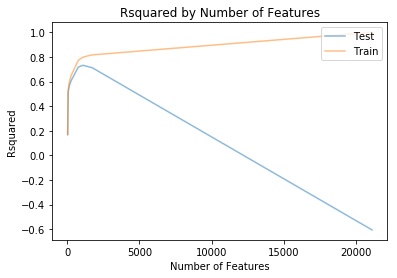

In [74]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25, 20, 0]
s
#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

> Too many features cause the test score to drop drastically while the train score approaching 1.

**4.** Use the output and above plot to correctly fill in the keys of the **q4_piat** dictionary with the correct variable.  Notice that only the optimal model results are given back in the above - they are stored in **lm_model**, **X_train**, **X_test**, **y_train**, and **y_test**.  If more than one answer holds, provide a tuple holding all the correct variables in the order of first variable alphabetically to last variable alphabetically.

In [75]:
# Cell for your computations to answer the next question
print(X_train.shape[1]) #Number of columns
print(max(r2_scores_train))
print(max(r2_scores_test))

1088
1.0
0.7316766986704023


In [76]:
h = 'we would likely have a better rsquared for the training data.'

q4_piat = {'The optimal number of features based on the results is': 1088, 
               'The model we should implement in practice has a train rsquared of': 1, 
               'The model we should implement in practice has a test rsquared of': 0.73,
               'If we were to allow the number of features to continue to increase': h
}

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

#### Run the below to complete the following dictionary

In [77]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
42,Country_United States,56731.283619,56731.283619
28,Country_Norway,40550.628110,40550.628110
8,Country_Australia,40111.916279,40111.916279
383,Currency_Swiss francs,36748.955151,36748.955151
15,Country_Denmark,30497.628811,30497.628811
123,YearsCodedJob_20 or more years,29980.868555,29980.868555
27,Country_New Zealand,29954.315738,29954.315738
23,Country_Israel,29510.172957,29510.172957
13,Country_Canada,29363.254074,29363.254074
22,Country_Ireland,28551.627756,28551.627756


In [78]:
a = True
b = False

#According to the data...
q5_piat = {'Country appears to be one of the top indicators for salary': a,
               'Gender appears to be one of the indicators for salary': b,
               'How long an individual has been programming appears to be one of the top indicators for salary': a,
               'The longer an individual has been programming the more they are likely to earn': b}

#### Congrats of some kind

Congrats!  Hopefully this was a great review, or an eye opening experience about how to put the steps together for an analysis.  List the steps.  In the next lesson, you will look at how take this and show it off to others so they can act on it.